# K-Means
-  Search for predetermined number of clusters within unlabeled multidimensional dataset
-  **Cluster Center**: Mean of all points belonging to cluster

### Limitations
1. Global optimal reuslt may not be achieved (Due to inappropriate initial center)
2. Number of clusters must be predetermined (Can lead to inapprppriate number of clusters)
3. Fails with non linear boundaries (make_moon)

### 4 dimensional data containing four distinct blobs

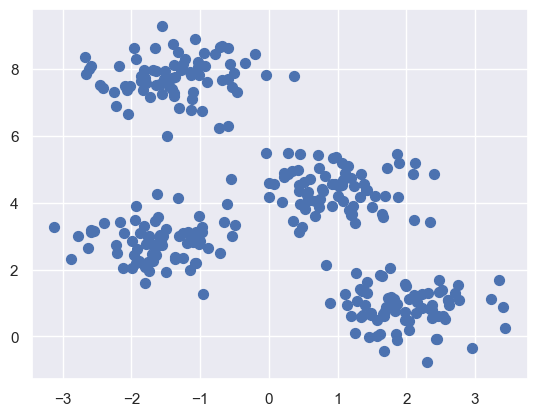

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np

from sklearn.datasets import make_blobs 
X, y_true = make_blobs(n_samples=300, centers= 4,
                        cluster_std=0.60, random_state=0) 
plt.scatter(X[:, 0], X[:, 1], s = 50) 

### 4 Clusters with cluster centers

C:\Users\me\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\me\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


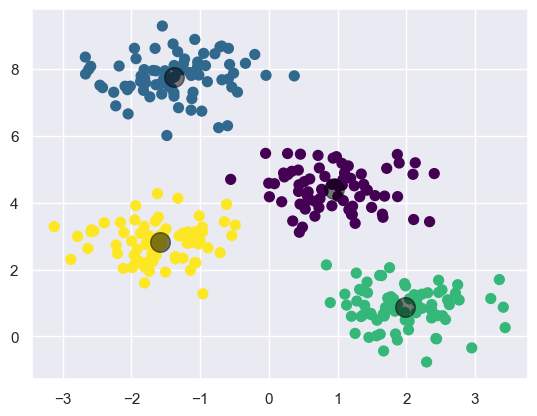

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# K-Means Algorithm 

1. Guess some cluster centers
2. Repeat until converged
- a. E-Step: assign points to the nearest cluster center
- b. M-Step: set the cluster centers to the mean

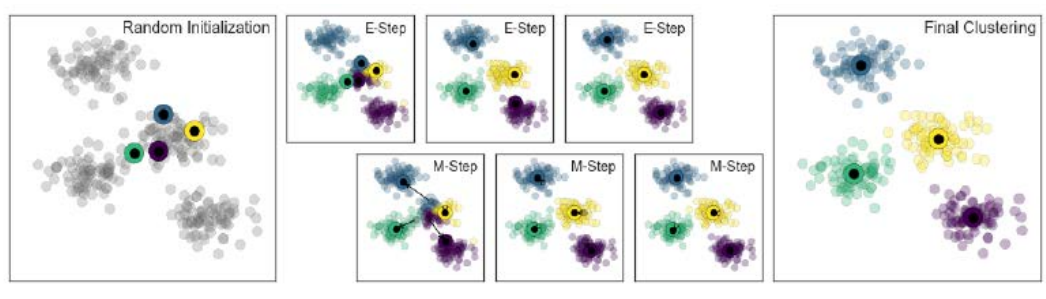

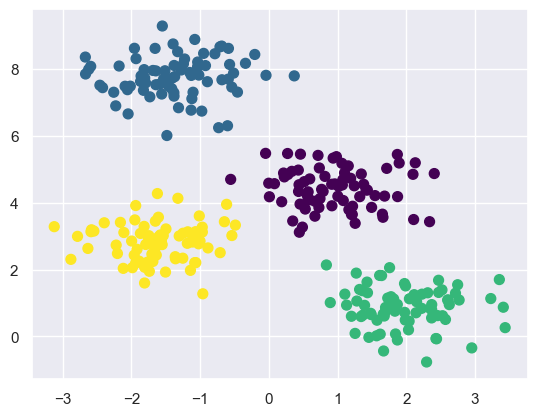

In [9]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #1. Randomly choose clusters
    rng = np.random.RandomState(rseed) 
    i = rng.permutation(X.shape[0])[:n_clusters] 
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center 
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers): 
            break 
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4) 
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');